<a href="https://colab.research.google.com/github/acubillosunal/UBM-DEEP-LEARNING-1/blob/main/U2.01%20-%20The%20Multilayer%20Perceptron%20with%20keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

# 2.2 - The Multilayer Perceptron

In [3]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [4]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import tensorflow as tf

## **Keras**

Keras es un marco de trabajo de código abierto para el aprendizaje automático escrito en Python. Está diseñado para ser fácil de usar, modular y extensible. Keras se puede utilizar para crear y entrenar modelos de aprendizaje automático para una variedad de tareas, incluyendo:

* Clasificación de imágenes
* Detección de objetos
* Segmentación de imágenes
* Procesamiento del lenguaje natural
* Traducción automática
* Generación de texto
* Series temporales

Características clave de Keras

* Facilidad de uso: Keras proporciona una API simple y fácil de usar que hace que sea fácil comenzar con el aprendizaje automático.
Modularidad: Keras está diseñado como un conjunto de módulos independientes que se pueden combinar y combinar para crear modelos de aprendizaje automático complejos.
* Extensibilidad: Keras es extensible y se puede personalizar para satisfacer las necesidades de proyectos específicos.
* Flexibilidad: Keras se puede usar con una variedad de backends, incluyendo TensorFlow, Theano y CNTK.

Beneficios de usar Keras

* Acelera el desarrollo de modelos: Keras puede ayudarte a crear y entrenar modelos de aprendizaje automático más rápido que con otros marcos de trabajo.
* Facilidad de uso: Keras es fácil de aprender y usar, incluso para principiantes en aprendizaje automático.
* Flexibilidad: Keras se puede usar con una variedad de backends y bibliotecas, lo que te da la flexibilidad de elegir las herramientas adecuadas para tu proyecto.


## Definir la arquitectura de red usando keras.

### Sequential models

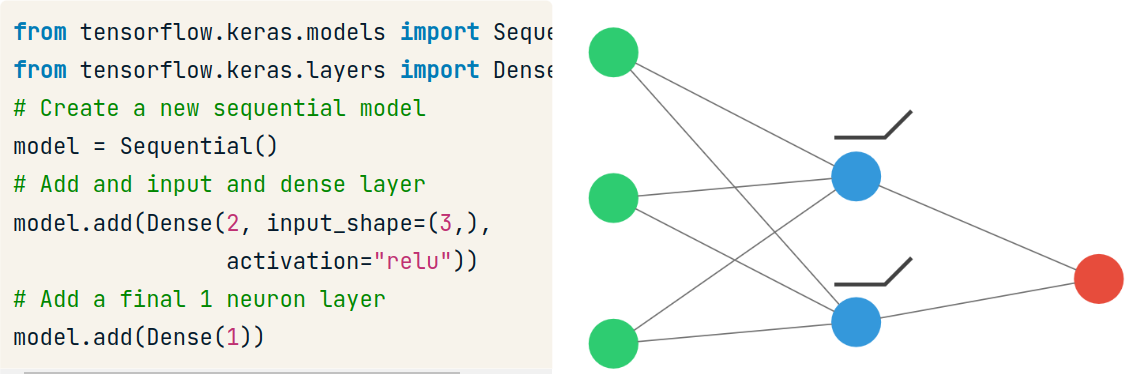

In [5]:
from IPython.display import Image
Image(filename='local/imgs/keras.png')

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(2, input_shape = (3,),
                activation = 'relu'))

model.add(Dense(1))

2024-03-12 18:42:14.363790: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-12 18:42:14.364847: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


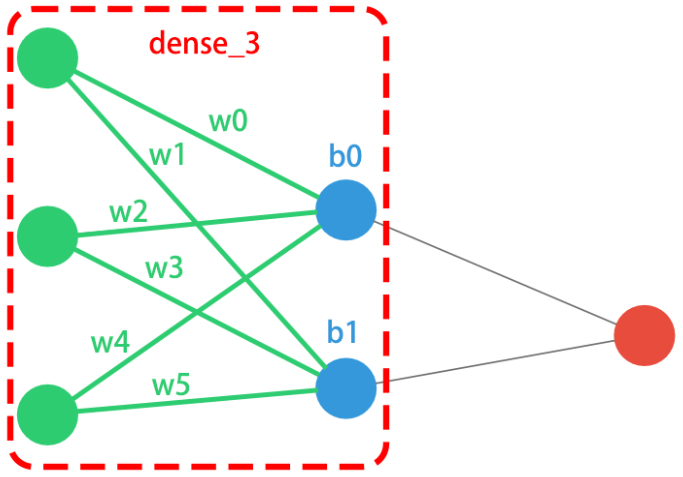

In [7]:
Image(filename='local/imgs/first_neural_network.png')

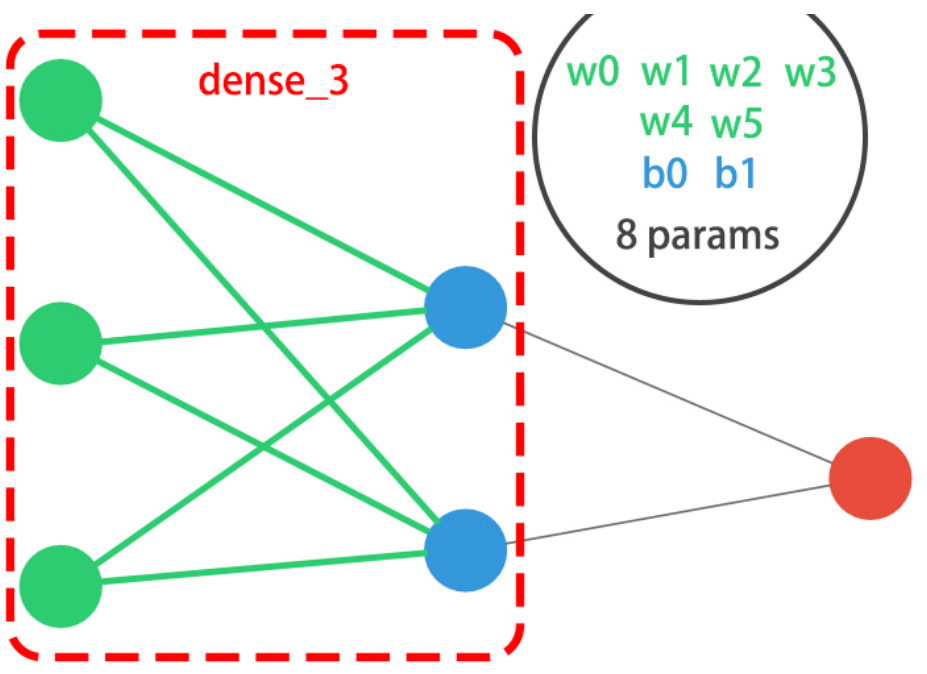

In [8]:
Image(filename = 'local/imgs/visualize_parameters.png')

## **Classifying Fashion-MNIST**

You will have to create a classification model for the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) dataset, a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network.

In [9]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


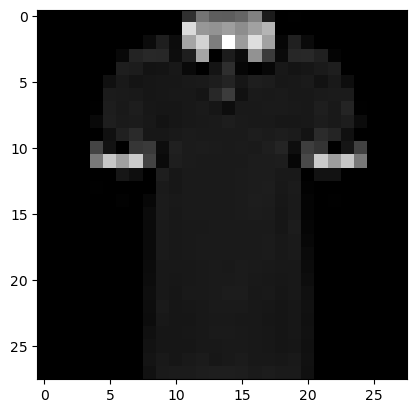

In [11]:
ind = np.random.permutation(X_train.shape[0])
plt.imshow(x_train[ind[1],:,:], cmap='gray');

In [12]:
from tensorflow.keras import utils 
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

## **Define the network architecture using keras**

### Sequential models

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

del model
model = Sequential([
    Dense(32, input_shape=(input_dim,)),
    Activation('tanh'),
    Dense(nb_classes),
    Activation('softmax'),
])

or

In [14]:
del model
model = Sequential()
model.add(Dense(64, input_dim=input_dim))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dense(nb_classes, activation='softmax'))

**Assignment**: Take a look to the core layers in keras: https://keras.io/layers/core/ and the set of basic parameters https://keras.io/layers/about-keras-layers/

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Once the arquictecture of model has been defined, the next step is to set the loss function and optimizer

In [16]:
# pass optimizer by name: default parameters will be used
model.compile(loss='categorical_crossentropy', optimizer='sgd')

from tensorflow.keras import optimizers
# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

Remember the definition of cross entropy:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)$$

The categorical cross entropy can be defined as:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^C {\bf{1}}_{y_i \in C_j} \log p_{model}[y_i \in C_j]$$

The term ${\bf{1}}_{y_i \in C_j}$ is the indicator function of the $i$-th observation belonging to the $j$-th category. The $p_{model}[y_i \in C_j]$ is the probability predicted by the model for the $i$-th observation to belong to the $j$-th category. When there are more than two categories, the neural network outputs a vector of $C$ probabilities, each giving the probability that the network input should be classified as belonging to the respective category. When the number of categories is just two, the neural network outputs a single probability $\hat{y}_i$, with the other one being $1$ minus the output. This is why the binary cross entropy looks a bit different from categorical cross entropy, despite being a special case of it. 

**Note**. If insteat of a multi-class problem we would be facing a multi-label classification problem, the activation function of the last layer must be a **sigmoid** and the loss function **binary_crossentropy**.

Take a look to compile and fit parameters https://keras.io/models/model/#compile

In [17]:
print("Training...")
model.train_on_batch(X_trainN, y_trainOHE)

print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)

Training...
Generating test predictions...


real class
9


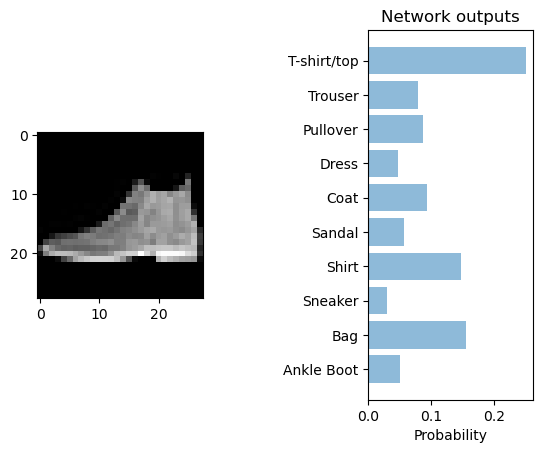

In [18]:
print('real class')
print(y_test[0])

objects = ('Ankle Boot', 'Bag', 'Sneaker', 'Shirt', 'Sandal', 'Coat', 'Dress', 'Pullover', 'Trouser', 'T-shirt/top')
y_pos = np.arange(nb_classes)
performance = preds.flatten()
plt.subplot(121)
plt.imshow(X_test[0,:].reshape(28,28), cmap='gray');
plt.subplot(122) 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
plt.subplots_adjust(wspace = 1)
plt.show()

In [19]:
print("Training...")
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Training...
Epoch 1/10
3375/3375 - 6s - loss: 0.4583 - val_loss: 0.4093 - 6s/epoch - 2ms/step
Epoch 2/10
3375/3375 - 5s - loss: 0.3664 - val_loss: 0.3823 - 5s/epoch - 2ms/step
Epoch 3/10
3375/3375 - 5s - loss: 0.3388 - val_loss: 0.3613 - 5s/epoch - 2ms/step
Epoch 4/10
3375/3375 - 5s - loss: 0.3190 - val_loss: 0.3488 - 5s/epoch - 2ms/step
Epoch 5/10
3375/3375 - 6s - loss: 0.3015 - val_loss: 0.3588 - 6s/epoch - 2ms/step
Epoch 6/10
3375/3375 - 5s - loss: 0.2905 - val_loss: 0.3539 - 5s/epoch - 2ms/step
Epoch 7/10
3375/3375 - 5s - loss: 0.2795 - val_loss: 0.3591 - 5s/epoch - 2ms/step
Epoch 8/10
3375/3375 - 5s - loss: 0.2682 - val_loss: 0.3456 - 5s/epoch - 2ms/step
Epoch 9/10
3375/3375 - 5s - loss: 0.2603 - val_loss: 0.3545 - 5s/epoch - 2ms/step
Epoch 10/10
3375/3375 - 5s - loss: 0.2512 - val_loss: 0.3674 - 5s/epoch - 2ms/step


Generating test predictions...


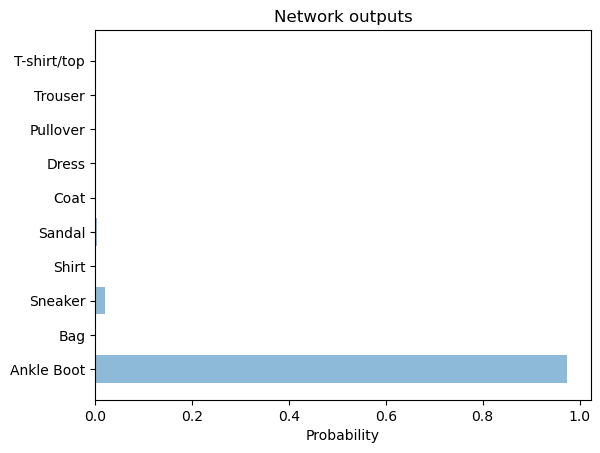

In [20]:
print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)
performance = preds.flatten()
 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
 
plt.show()

In [21]:
preds = np.argmax(model.predict(X_testN), axis=-1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

313/313 [==============================] - 0s 1ms/step
Accuracy =  86.28 %


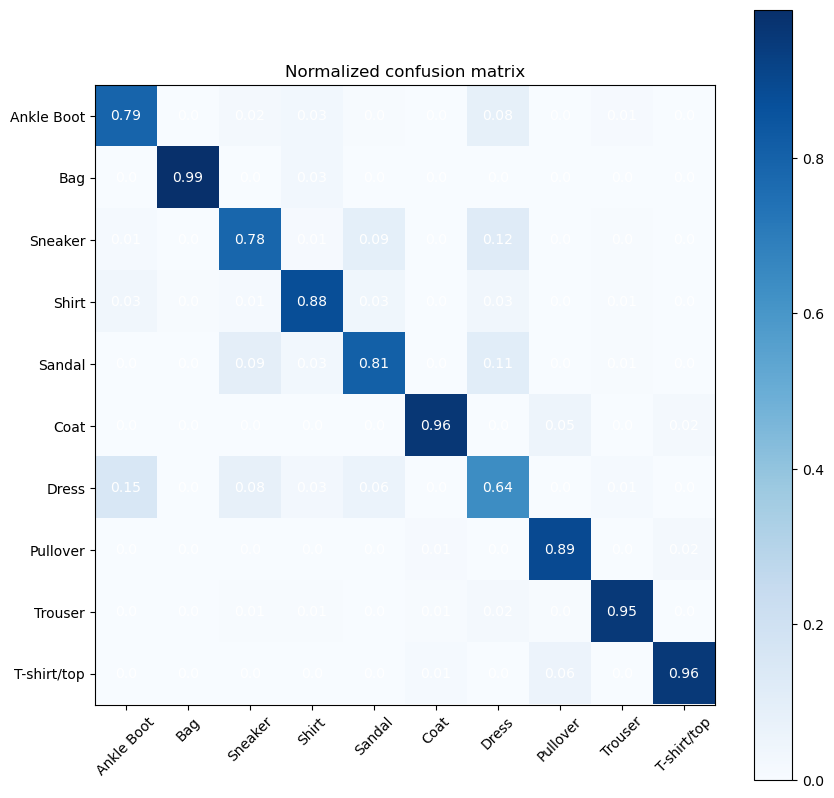

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm = cm/np.sum(cm,axis=0)
cmap = plt.cm.Blues
tick_marks = np.arange(nb_classes)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects);

### Functional models

The Keras functional API provides a more flexible way for defining models.

It allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model.

In [23]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='tanh')(inputs)
x = Dense(32, activation='tanh')(x)
predictions = Dense(nb_classes, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
3375/3375 - 5s - loss: 0.5591 - accuracy: 0.8148 - val_loss: 0.4241 - val_accuracy: 0.8487 - 5s/epoch - 2ms/step
Epoch 2/10
3375/3375 - 5s - loss: 0.3918 - accuracy: 0.8640 - val_loss: 0.3845 - val_accuracy: 0.8578 - 5s/epoch - 1ms/step
Epoch 3/10
3375/3375 - 5s - loss: 0.3510 - accuracy: 0.8754 - val_loss: 0.3661 - val_accuracy: 0.8642 - 5s/epoch - 1ms/step
Epoch 4/10
3375/3375 - 5s - loss: 0.3245 - accuracy: 0.8859 - val_loss: 0.3563 - val_accuracy: 0.8687 - 5s/epoch - 1ms/step
Epoch 5/10
3375/3375 - 5s - loss: 0.3042 - accuracy: 0.8927 - val_loss: 0.3496 - val_accuracy: 0.8743 - 5s/epoch - 1ms/step
Epoch 6/10
3375/3375 - 5s - loss: 0.2889 - accuracy: 0.8973 - val_loss: 0.3389 - val_accuracy: 0.8755 - 5s/epoch - 1ms/step
Epoch 7/10
3375/3375 - 5s - loss: 0.2742 - accuracy: 0.9021 - val_loss: 0.3417 - val_accuracy: 0.8788 - 5s/epoch - 2ms/step
Epoch 8/10
3375/3375 - 5s - loss: 0.2625 - accuracy: 0.9062 - val_loss: 0.3343 - val_accuracy: 0.8785 - 5s/epoch - 1ms/step
Epoch 9/

In [26]:
preds = np.argmax(model.predict(X_testN), axis=-1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

313/313 [==============================] - 0s 1ms/step
Accuracy =  87.37 %


**Note**. Take a look to the keras functional API available on https://keras.io/getting-started/functional-api-guide/

## **Pruebas**

In [76]:
np.random.seed(42)

inputs = np.random.normal(0,1, 4).reshape(2, 2)
print(inputs.shape)
inputs

(2, 2)


array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986]])

In [104]:
# Assuming D neurons, input shape (m, n), and ReLU activation
def initial_layer(inputs, D):
    np.random.seed(42)

    weights = np.random.randn(D, inputs.shape[1])  # Initialize weights randomly
    biases = np.zeros(D)  # Initialize biases with zeros

    weighted_sums = np.dot(weights, inputs) + biases  # Calculate weighted sums
    outputs = np.maximum(weighted_sums, 0)  # Apply ReLU activation

    return outputs, weights, weighted_sums, biases


In [105]:
outputs, weights, weighted_sums, biases = initial_layer(inputs, 2)
outputs, weights, weighted_sums, biases

(array([[0.15717275, 0.        ],
        [1.30816504, 2.23006774]]),
 array([[ 0.49671415, -0.1382643 ],
        [ 0.64768854,  1.52302986]]),
 array([[ 0.15717275, -0.27925849],
        [ 1.30816504,  2.23006774]]),
 array([0., 0.]))

In [139]:
import numpy as np

np.random.seed(42)

# Example usage:
input_size = 2
hidden_size = 3
output_size = 1

# initialize weights matrix and biases with random values
input_data = [[1,2], [3,4], [5,6]]
target = np.array([[3], [6], [9]])
input_data = np.array(input_data)

W_input_hidden = np.random.rand(hidden_size, input_size)
b_input_hidden = np.random.rand(hidden_size, 1)
W_hidden_output = np.random.rand(output_size, hidden_size)
b_hidden_output = np.random.rand(output_size, 1)

In [140]:
hidden_layer_input = W_input_hidden.dot(input_data.T) + b_input_hidden
hidden_layer_input

array([[2.33405234, 4.98456119, 7.63507004],
       [2.79548706, 5.45679191, 8.11809676],
       [1.06912269, 1.69314901, 2.31717534]])

In [141]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [142]:
hidden_layer_output = sigmoid(hidden_layer_input)
hidden_layer_output

array([[0.91165825, 0.99320373, 0.99951703],
       [0.94243147, 0.99575091, 0.99970199],
       [0.74443004, 0.84463784, 0.91028954]])

In [144]:
output_layer_input = W_hidden_output.dot(hidden_layer_output) + b_hidden_output
output_layer_input

array([[2.21939235, 2.37542255, 2.44365039]])

### **Real Problem Application**

In [145]:
# XOR truth table values
xor_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_target = np.array([[0], [1], [1], [0]])

# MLP parameters
input_size = 2
hidden_size = 10
output_size = 1

# instatiate the MLP
model = MLP(input_size, hidden_size, output_size)
model.train(xor_input, xor_target)

# test for each input
test_xor_00 = np.array([[0, 0]])
test_xor_01 = np.array([[0, 1]])
test_xor_10 = np.array([[1, 0]])
test_xor_11 = np.array([[1, 1]])
_, prediction_00 = model2.forward(test_xor_00)
_, prediction_01 = model2.forward(test_xor_01)
_, prediction_10 = model2.forward(test_xor_10)
_, prediction_11 = model2.forward(test_xor_11)

print("Predicted 00 output:", prediction_00)
print("Predicted 01 output:", prediction_01)
print("Predicted 10 output:", prediction_10)
print("Predicted 11 output:", prediction_11)

NameError: name 'MLP' is not defined